# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [7]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt



***Zadanie 1.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

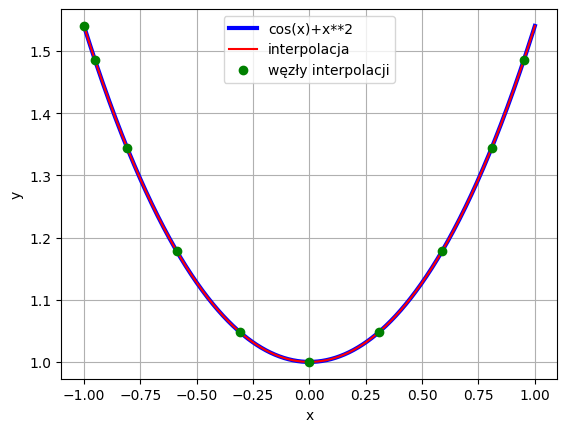

In [8]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

C:\Users\Michał\Desktop\Metody numeryczne\laboratorium-6-cynarski\main.py:76: RuntimeWarning: divide by zero encountered in divide
  L = wi /(x - xi)
C:\Users\Michał\Desktop\Metody numeryczne\laboratorium-6-cynarski\main.py:78: RuntimeWarning: invalid value encountered in double_scalars
  Y.append(yi @ L / sum(L))


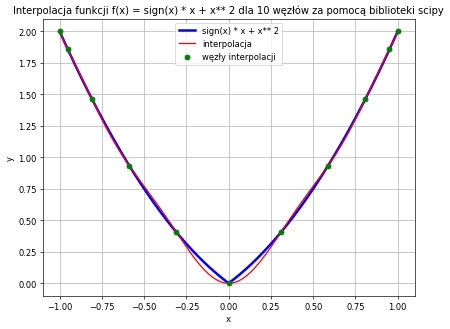

30 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


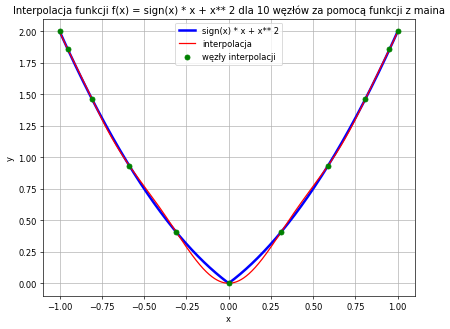

32 ns ± 4 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


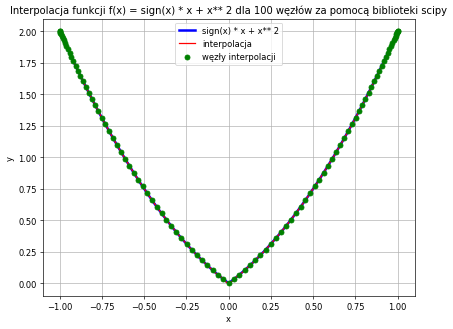

32 ns ± 4 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


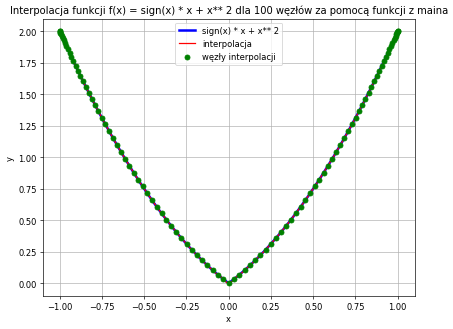

30 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


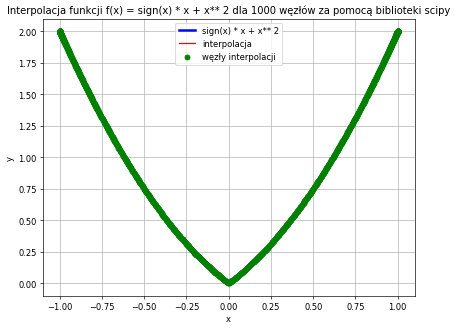

30 ns ± 11 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


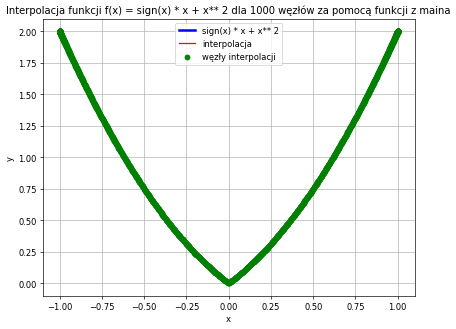

30 ns ± 6.32 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


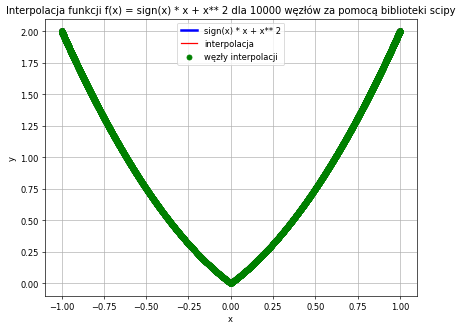

28 ns ± 9.8 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


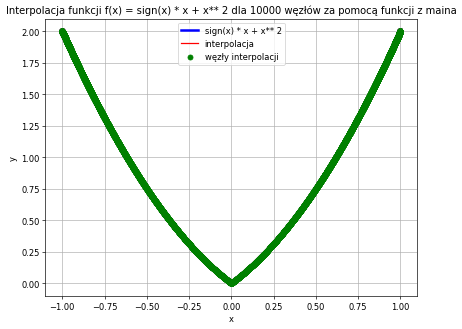

32 ns ± 9.8 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


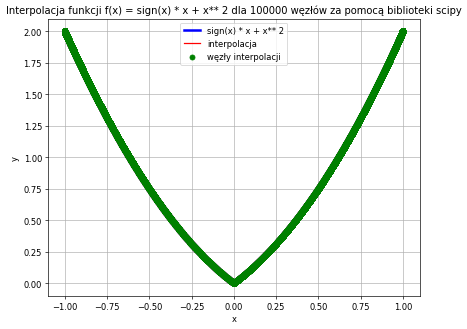

30 ns ± 6.32 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


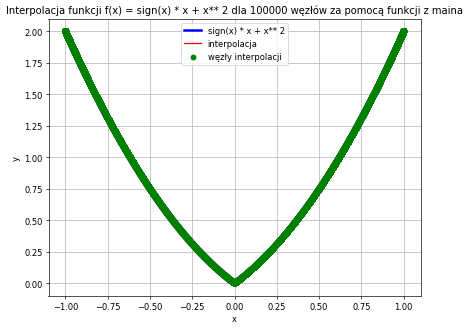

32 ns ± 9.8 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [9]:
from scipy.interpolate import barycentric_interpolate

time_main = []
time_scipy = []

f = lambda x: np.sign(x) * x + x** 2
lst = [10,100,1000,10000,100000]
x = np.linspace(-1,1,1000)
for i in lst:
    interpolation_nodes_number = i
    x_cz = main.chebyshev_nodes(interpolation_nodes_number)

    yimp = barycentric_interpolate(x_cz,f(x_cz),x)
    yimp_main = main.barycentric_inte(x_cz,f(x_cz),main.bar_czeb_weights(i),x)
    plt.figure(figsize=(8, 6), dpi=60)
    plt.plot(x,f(x),'b',  linewidth=3 ,label = 'sign(x) * x + x** 2')
    plt.plot(x,yimp,'r',label = 'interpolacja')
    plt.plot(x_cz,f(x_cz),'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 9)
    plt.title(f"Interpolacja funkcji f(x) = sign(x) * x + x** 2 dla {i} węzłów za pomocą biblioteki scipy")
    plt.grid()
    plt.show()
    time_solve = %timeit -r 5 -n 10 -o yimp
    time_scipy.append(time_solve.average)

    plt.figure(figsize=(8, 6), dpi=60)
    plt.plot(x,f(x),'b',  linewidth=3 ,label = 'sign(x) * x + x** 2')
    plt.plot(x,yimp_main,'r',label = 'interpolacja')
    plt.plot(x_cz,f(x_cz),'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 9)
    plt.title(f"Interpolacja funkcji f(x) = sign(x) * x + x** 2 dla {i} węzłów za pomocą funkcji z maina")
    plt.grid()
    plt.show()
    time_m = %timeit -r 5 -n 10 -o yimp_main
    time_main.append(time_m.average)



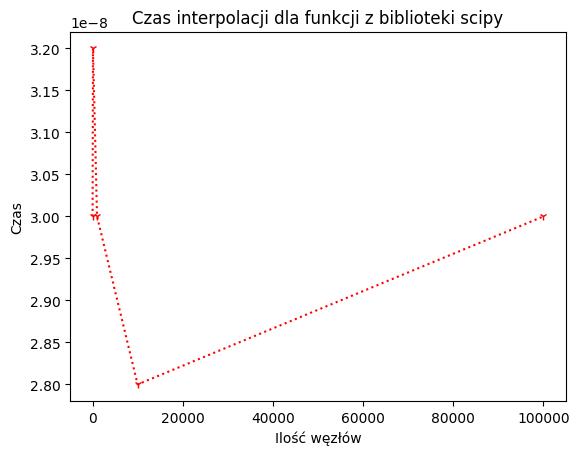

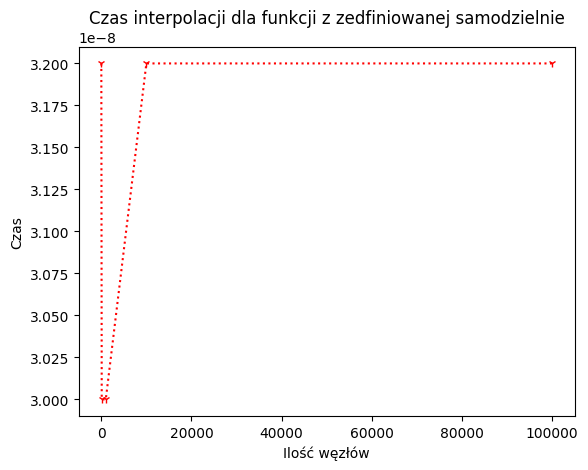

In [10]:
plt.plot(lst,time_scipy,'r1:')
plt.xlabel("Ilość węzłów")
plt.ylabel("Czas")
plt.title("Czas interpolacji dla funkcji z biblioteki scipy")
plt.show()

plt.plot(lst,time_main,'r1:')
plt.xlabel("Ilość węzłów")
plt.ylabel("Czas")
plt.title("Czas interpolacji dla funkcji z zedfiniowanej samodzielnie")
plt.show()

***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

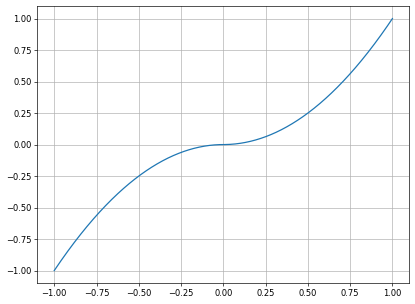

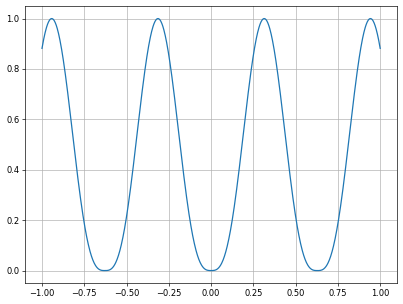

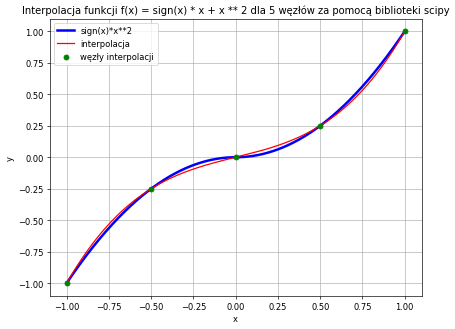

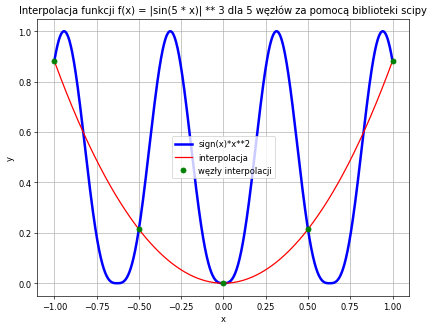

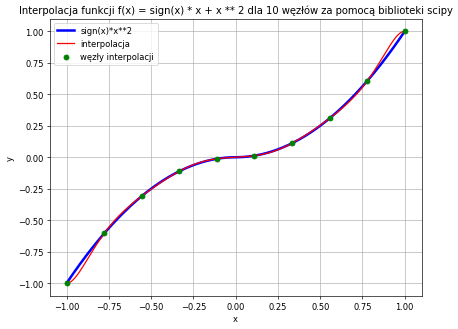

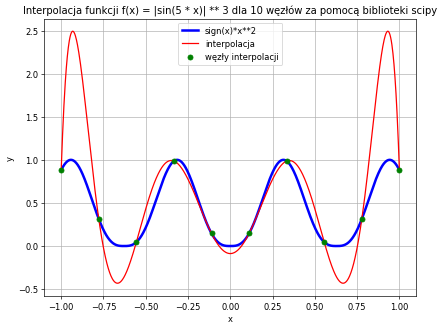

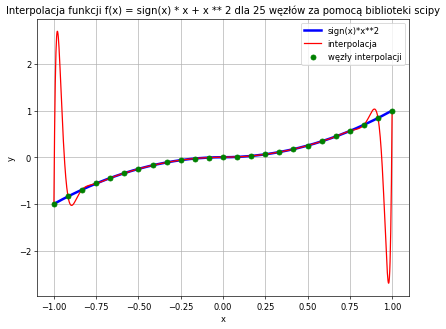

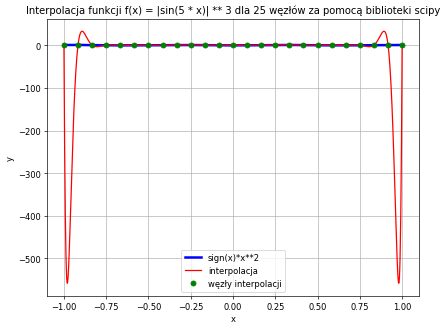

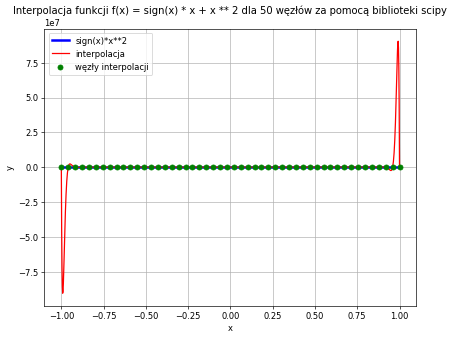

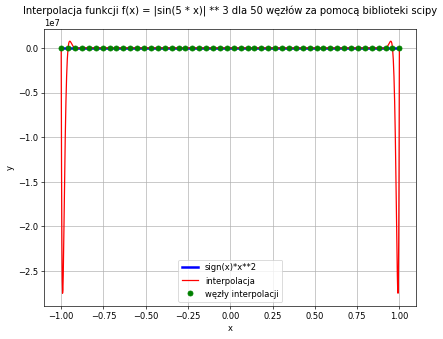

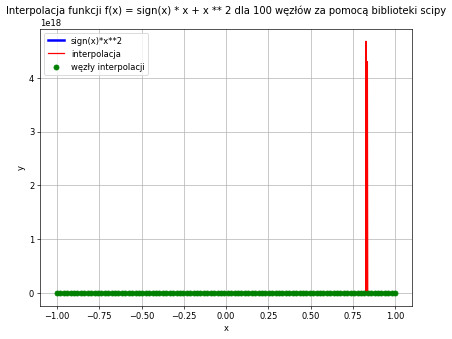

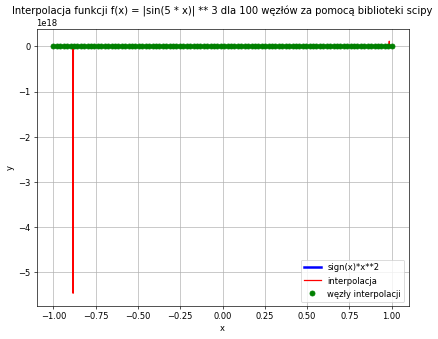

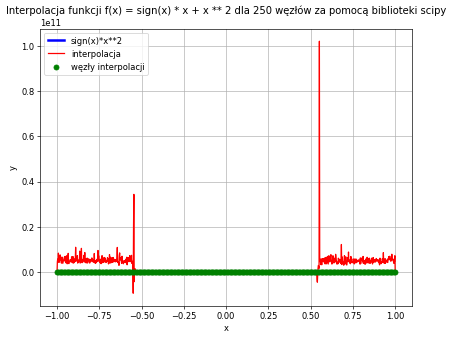

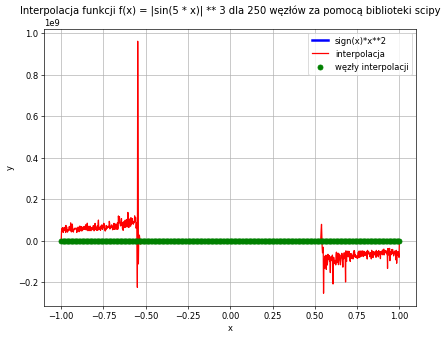

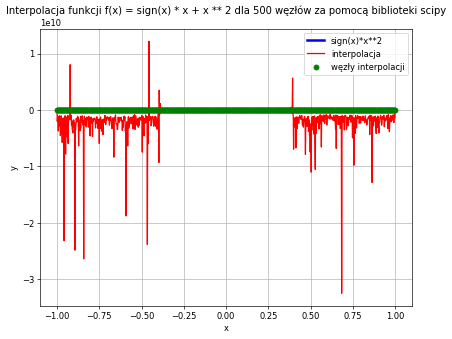

C:\Users\Michał\AppData\Roaming\Python\Python310\site-packages\scipy\interpolate\_polyint.py:658: RuntimeWarning: divide by zero encountered in divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


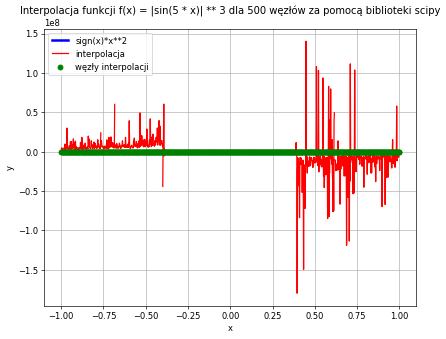

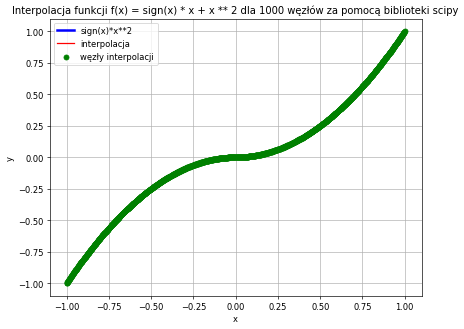

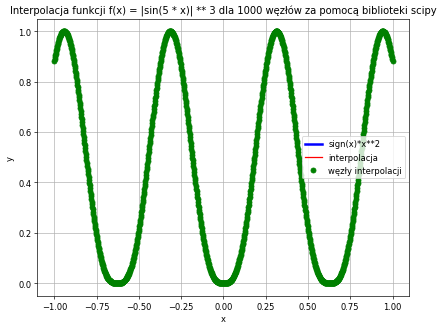

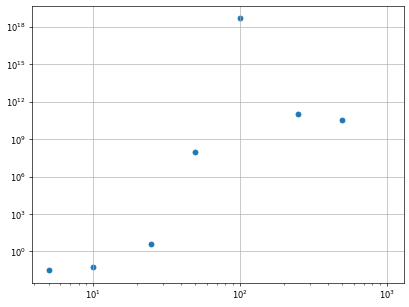

[0.03207500749620784, 0.056792160580258044, 3.6596566883537545, 90491994.96298617, 4.676022174078609e+18, 102030399622.96922, 32493987870.50258, 0.0]


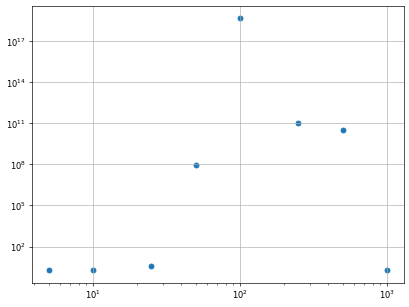

[1.9039495240691644, 1.9595062078187242, 3.6476261425231984, 90491996.8583263, 4.676022174078609e+18, 102030399623.22092, 32493987870.055573, 1.9128261942870266]


In [11]:
f_r1 = lambda x: np.sign(x) * x ** 2
f_r3 = lambda x: abs(np.sin(5 * x)) ** 3
error_1 = []
error_3 = []
lst = [5,10,25,50,100,250,500,1000]
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(np.linspace(-1,1,1000),f_r1(x))
plt.grid()
plt.show()
plt.figure(figsize=(8, 6), dpi=60)
plt.plot(np.linspace(-1,1,1000),f_r3(x))
plt.grid()
plt.show()

for i in lst:

    x = np.linspace(-1,1,1000) # punkty równoległe
    values = f_r1(x) # wartości funkcji dla naszego wektora
    vector = np.linspace(-1,1,i) # wezły Czybyszewa

    yimp = barycentric_interpolate(vector,f_r1(vector),x)
    plt.figure(figsize=(8, 6), dpi=60)
    plt.plot(x,f_r1(x),'b',  linewidth=3 ,label = 'sign(x)*x**2')
    plt.plot(x,yimp,'r',label = 'interpolacja')
    plt.plot(vector,f_r1(vector),'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Interpolacja funkcji f(x) = sign(x) * x + x ** 2 dla {i} węzłów za pomocą biblioteki scipy")
    plt.legend(loc = 0)
    plt.grid()
    plt.show()

    error_1.append(main.L_inf(f_r1(x),yimp))

    values = f_r3(x) # wartości funkcji dla naszego wektora
    vector3 = np.linspace(-1,1,i) # wezły Czybyszewa

    yimp3 = barycentric_interpolate(vector,f_r3(vector3),x)
    plt.figure(figsize=(8, 6), dpi=60)
    plt.plot(x,f_r3(x),'b',  linewidth=3 ,label = 'sign(x)*x**2')
    plt.plot(x,yimp3,'r',label = 'interpolacja')
    plt.plot(vector,f_r3(vector3),'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Interpolacja funkcji f(x) = |sin(5 * x)| ** 3 dla {i} węzłów za pomocą biblioteki scipy")
    plt.legend(loc = 0)
    plt.grid()
    plt.show()

    error_3.append(main.L_inf(f_r3(x),yimp))

plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(lst, error_1)
plt.semilogx()
plt.semilogy()
plt.grid()
plt.show()
print(error_1)
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(lst, error_3)
plt.semilogx()
plt.semilogy()
plt.grid()
plt.show()
print(error_3)

***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

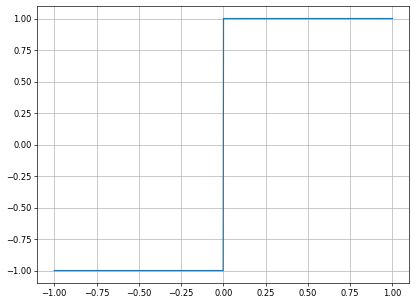

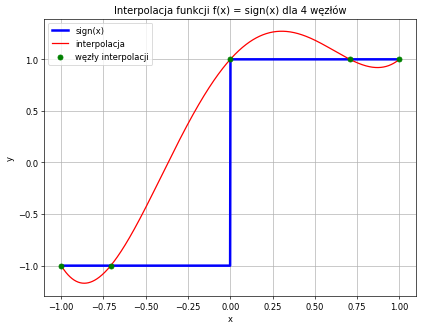

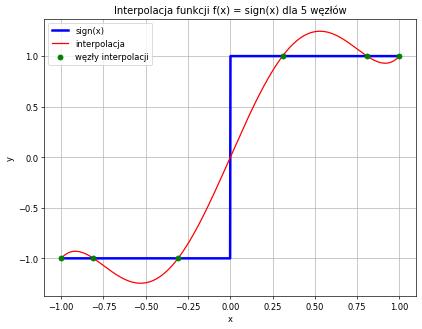

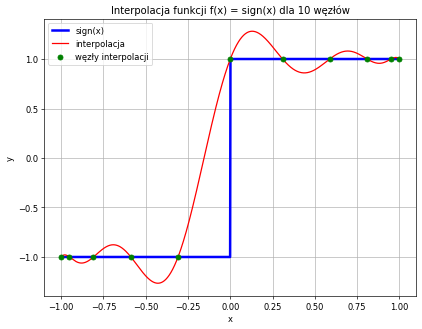

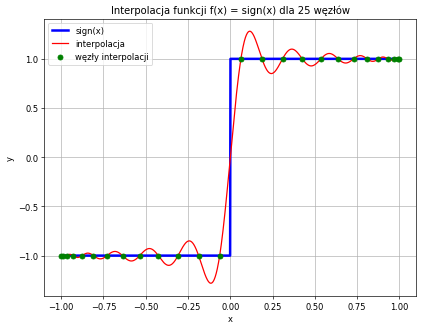

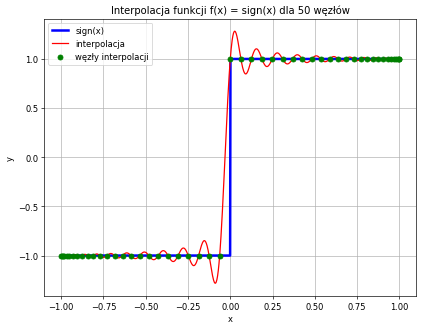

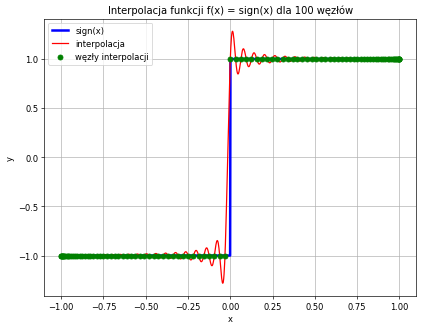

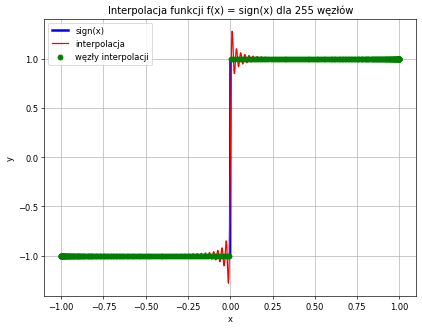

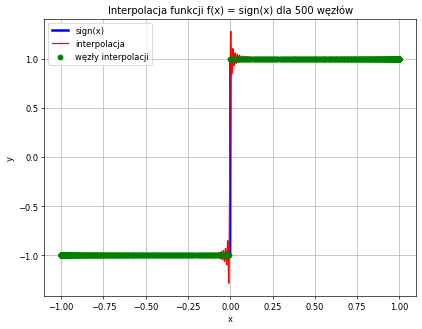

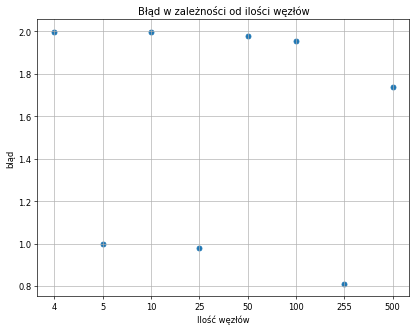

In [12]:
error = []
f_nc = lambda x: np.sign(x)

plt.figure(figsize=(8, 6), dpi=60)
plt.plot(x,f_nc(x))
plt.grid()
plt.show()

lst = [4,5,10,25,50,100,255,500]
for i in lst:

    # węzły Czybyszewa

    x_cz = main.chebyshev_nodes(i)
    fun = f_nc(x_cz)

    # interpolacja

    yimp = barycentric_interpolate(x_cz,fun,x)

    plt.figure(figsize=(8, 6), dpi=60)
    plt.plot(x,f_nc(x),'b',  linewidth=3 ,label = 'sign(x)')
    plt.plot(x,yimp,'r',label = 'interpolacja')
    plt.plot(x_cz,f_nc(x_cz),'go',label = 'węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 0)
    plt.title(f"Interpolacja funkcji f(x) = sign(x) dla {i} węzłów")
    plt.grid()
    plt.show()
    error.append(main.L_inf(f_nc(x),yimp))
plt.figure(figsize=(8, 6), dpi=60)
plt.scatter(['4','5','10','25','50','100','255','500'],error)
plt.ylabel('bląd')
plt.xlabel("Ilość węzłów")
plt.title("Błąd w zależności od ilości węzłów")
plt.grid()
plt.show()


WNIOSKI:

Na dzisiejszym laboratorium zapoznaliśmy się z tematem interpolacji. Poznaliśm zastosowanie węzłów Czybyszewa oraz węzłów rónoległych. Zobaczyliśmy jak numerycznie za pomocą węzłów są przybliżane oraz jaki błedy to generuje. Poznaliśmy także efekt Ruggego oraz efekt Gibbsa.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)